In [2]:
pip install torchvision

     |████████████████████████████████| 21.0 MB 15.4 MB/s eta 0:00:01   |██                              | 1.4 MB 5.3 MB/s eta 0:00:04
Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [7]:
USE_CUDA=torch.cuda.is_available()
device=torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:",device)

다음 기기로 학습합니다: cpu


In [8]:
random.seed(777)
torch.manual_seed(777)
if device=='cuda':
    torch.cuda.manual_seed_all(777)

In [9]:
# hyperparameters
training_epochs=15
batch_size=100

---

In [10]:
mnist_train=dsets.MNIST(root='MNIST_data/',
                       train=True,
                       transform=transforms.ToTensor(),
                       download=True)

mnist_test=dsets.MNIST(root='MNIST_data/',
                      train=False,
                      transform=transforms.ToTensor(),
                      download=True)

0.1%

100.0%


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



102.8%


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100.0%


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



67.6%

112.7%

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [12]:
data_loader=DataLoader(dataset=mnist_train,
                      batch_size=batch_size,
                      shuffle=True,
                      drop_last=True) # 배치사이즈로 나누고 남은 나머지 마지막 배치를 버릴것인지 아닌지,
                                    #마지막 배치가 상대적으로 과대평가 되는 현상을 막음

In [13]:
linear=nn.Linear(784,10,bias=True).to(device)

In [14]:
criterion=nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.SGD(linear.parameters(), lr=0.1)

In [16]:
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=len(data_loader)
    
    for X, Y in data_loader:
        X=X.view(-1,28*28).to(device)
        
        Y=Y.to(device)
        
        optimizer.zero_grad()
        hypothesis=linear(X)
        cost=criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost+=cost/total_batch
        
    print('Epoch:', '%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning finished')

Epoch: 0001 cost = 0.535701573
Epoch: 0002 cost = 0.359403163
Epoch: 0003 cost = 0.331129968
Epoch: 0004 cost = 0.316610843
Epoch: 0005 cost = 0.307287782
Epoch: 0006 cost = 0.300151169
Epoch: 0007 cost = 0.295128852
Epoch: 0008 cost = 0.290526152
Epoch: 0009 cost = 0.287431419
Epoch: 0010 cost = 0.284428835
Epoch: 0011 cost = 0.281726062
Epoch: 0012 cost = 0.279582173
Epoch: 0013 cost = 0.277621865
Epoch: 0014 cost = 0.275999963
Epoch: 0015 cost = 0.274319828
Learning finished


Accuracy: 0.8833000063896179
Label:  1
Prediction:  8


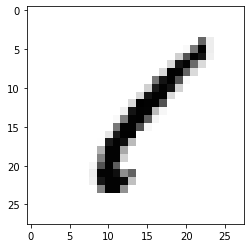

In [63]:
with torch.no_grad(): #gradient 계산을 수행하지 않는다.
    X_test=mnist_test.test_data.view(-1,28*28).float().to(device)
    Y_test=mnist_test.test_labels.to(device)
    
    prediction=linear(X_test)
    correct_prediction=torch.argmax(prediction, 1)==Y_test
    accuracy=correct_prediction.float().mean()
    print('Accuracy:',accuracy.item())
    
    r=random.randint(0, len(mnist_test)-1)
    X_single_data=mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
    Y_single_data=mnist_test.test_labels[r:r+1].to(device)
    
    print('Label: ',Y_single_data.item())
    single_prediction=linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap='Greys',interpolation='nearest')
    plt.show()